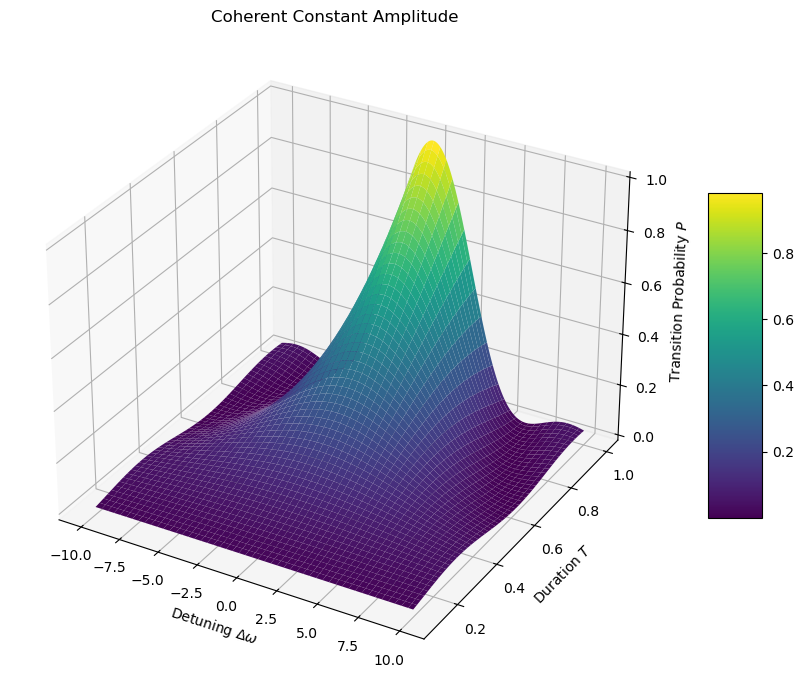

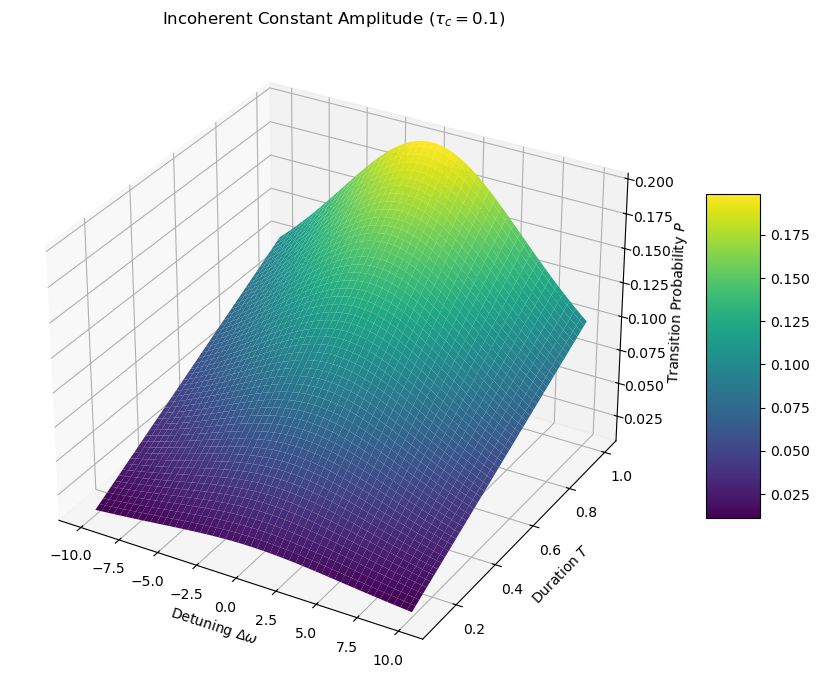

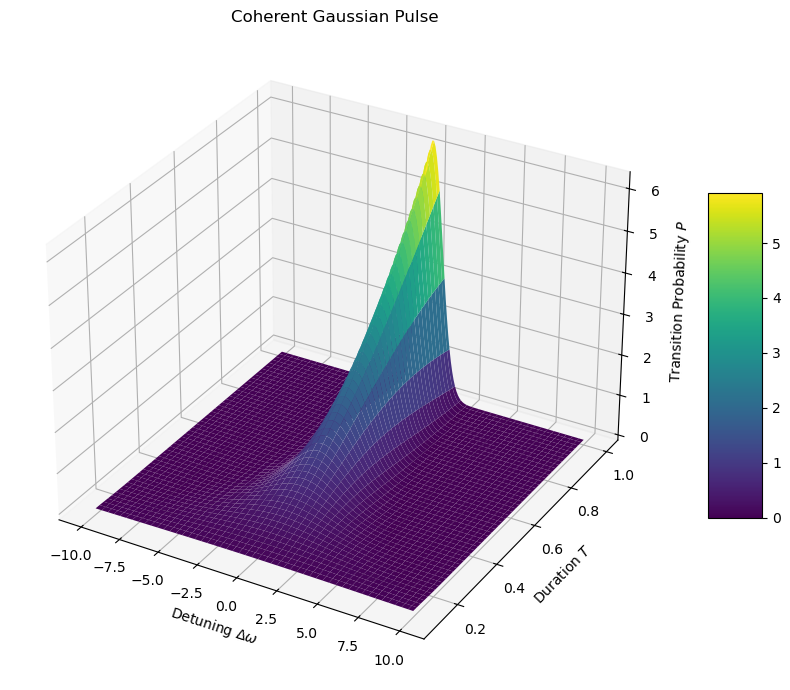

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Common setup
delta = np.linspace(-10, 10, 200)   # detuning Δω
T = np.linspace(0.1, 1.0, 200)      # duration of perturbation
Delta, Tau = np.meshgrid(delta, T)

# 3D plotting function
def plot_3d(Delta, Tau, P, title):
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(Delta, Tau, P, cmap='viridis')
    ax.set_xlabel(r'Detuning $\Delta\omega$')
    ax.set_ylabel(r'Duration $T$')
    ax.set_zlabel(r'Transition Probability $P$')
    ax.set_title(title)
    fig.colorbar(surf, ax=ax, shrink=0.5, aspect=6)
    plt.tight_layout()
    plt.show()


# Case 1: Coherent Constant Amplitude
# P ∝ T^2 sinc^2(Δω T / 2)

with np.errstate(divide='ignore', invalid='ignore'):
    sinc_sq = (np.sin(Delta * Tau / 2) / (Delta * Tau / 2))**2
sinc_sq[np.isnan(sinc_sq)] = 1.0   # correct limit at Δω → 0

P_const_coherent = Tau**2 * sinc_sq
plot_3d(Delta, Tau, P_const_coherent,
        'Coherent Constant Amplitude')

# Case 2: Incoherent Constant Amplitude
# P ∝ T · (2τ_c) / [1 + (Δω τ_c)^2]
tau_c = 0.1
P_incoherent = Tau * (2 * tau_c) / (1 + (Delta * tau_c)**2)

plot_3d(Delta, Tau, P_incoherent,
        r'Incoherent Constant Amplitude ($\tau_c=0.1$)')

# Case 3: Coherent Gaussian Pulse
# P ∝ 2π T^2 exp[-(Δω T)^2]
P_gaussian = 2 * np.pi * Tau**2 * np.exp(-(Delta * Tau)**2)

plot_3d(Delta, Tau, P_gaussian,
        'Coherent Gaussian Pulse')
